In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in cvs as dataframe
df = pd.read_csv("../Data/socialmedia_usage_agewise.csv")
df.head()

,usagedate,age_18_29_per,age_30_49_per,age_50_64_per,over_65_per
0,2005-03-21,0.07,0.06,0.04,0.03
1,2005-12-08,0.16,0.09,0.05,0.02
2,2006-08-31,0.41,0.06,0.03,0.00
3,2008-05-11,0.60,0.21,0.07,0.02
4,2008-08-10,0.65,0.27,0.10,0.03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   usagedate      30 non-null     object 
 1   age_18_29_per  30 non-null     float64
 2   age_30_49_per  30 non-null     float64
 3   age_50_64_per  30 non-null     float64
 4   over_65_per    30 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [4]:
# convert string to Datetime
df['usagedate'] = pd.to_datetime(df['usagedate'])

In [5]:
# extract the year
df['year'] = pd.to_datetime(df['usagedate']).dt.year
df.tail()

,usagedate,age_18_29_per,age_30_49_per,age_50_64_per,over_65_per,year
25,2015-07-12,0.90,0.77,0.51,0.35,2015
26,2016-11-06,0.86,0.80,0.64,0.34,2016
27,2018-01-10,0.88,0.78,0.64,0.37,2018
28,2019-02-07,0.90,0.82,0.69,0.40,2019
29,2021-02-08,0.84,0.81,0.73,0.45,2021


In [6]:
# drop usagedate column
df.drop(columns=['usagedate'], inplace=True)
df.head()

,age_18_29_per,age_30_49_per,age_50_64_per,over_65_per,year
0,0.07,0.06,0.04,0.03,2005
1,0.16,0.09,0.05,0.02,2005
2,0.41,0.06,0.03,0.00,2006
3,0.60,0.21,0.07,0.02,2008
4,0.65,0.27,0.10,0.03,2008


In [7]:
# groupby year to get the mean
df = df.groupby(['year'], as_index=False).mean()
df

,year,age_18_29_per,age_30_49_per,age_50_64_per,over_65_per
0,2005,0.115000,0.075000,0.045000,0.025000
1,2006,0.410000,0.060000,0.030000,0.000000
2,2008,0.638000,0.266000,0.092000,0.024000
3,2009,0.716667,0.443333,0.220000,0.063333
4,2010,0.776667,0.531667,0.326667,0.106667
5,2011,0.805000,0.600000,0.370000,0.130000
6,2012,0.845000,0.660000,0.435000,0.190000
7,2013,0.876667,0.726667,0.510000,0.240000
8,2014,0.840000,0.770000,0.520000,0.270000
9,2015,0.900000,0.770000,0.510000,0.350000


In [8]:
# create new column 25-34 years age range
df['25-34 years'] = (5/11)*df['age_18_29_per'] + (5/19)*df['age_30_49_per']
df

,year,age_18_29_per,age_30_49_per,age_50_64_per,over_65_per,25-34 years
0,2005,0.115000,0.075000,0.045000,0.025000,0.072010
1,2006,0.410000,0.060000,0.030000,0.000000,0.202153
2,2008,0.638000,0.266000,0.092000,0.024000,0.360000
3,2009,0.716667,0.443333,0.220000,0.063333,0.442424
4,2010,0.776667,0.531667,0.326667,0.106667,0.492943
5,2011,0.805000,0.600000,0.370000,0.130000,0.523804
6,2012,0.845000,0.660000,0.435000,0.190000,0.557775
7,2013,0.876667,0.726667,0.510000,0.240000,0.589713
8,2014,0.840000,0.770000,0.520000,0.270000,0.584450
9,2015,0.900000,0.770000,0.510000,0.350000,0.611722


In [9]:
# rename and reorder columns to match suicide dataset
df.rename(columns={'age_18_29_per': '15-24 years', 'age_30_49_per': '35-54 years', 'age_50_64_per': '55-74 years', 'over_65_per': '75+ years'}, inplace=True)
new_column_order = ['year', "15-24 years", "25-34 years", "35-54 years", '55-74 years', '75+ years']
df = df[new_column_order]
df

,year,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
0,2005,0.115000,0.072010,0.075000,0.045000,0.025000
1,2006,0.410000,0.202153,0.060000,0.030000,0.000000
2,2008,0.638000,0.360000,0.266000,0.092000,0.024000
3,2009,0.716667,0.442424,0.443333,0.220000,0.063333
4,2010,0.776667,0.492943,0.531667,0.326667,0.106667
5,2011,0.805000,0.523804,0.600000,0.370000,0.130000
6,2012,0.845000,0.557775,0.660000,0.435000,0.190000
7,2013,0.876667,0.589713,0.726667,0.510000,0.240000
8,2014,0.840000,0.584450,0.770000,0.520000,0.270000
9,2015,0.900000,0.611722,0.770000,0.510000,0.350000


In [10]:
# change columns to row
df = df.melt(id_vars=["year"], 
        var_name="age_range", 
        value_name="usage")

In [12]:
df.head()

,year,age_range,usage
0,2005,15-24 years,0.115000
1,2006,15-24 years,0.410000
2,2008,15-24 years,0.638000
3,2009,15-24 years,0.716667
4,2010,15-24 years,0.776667


In [14]:
# get median age of age_range column and get year born
df.loc[(df['age_range'] == '15-24 years'), 'age_med'] = 20  
df.loc[(df['age_range'] == '25-34 years'), 'age_med'] = 30 
df.loc[(df['age_range'] == '35-54 years'), 'age_med'] = 45 
df.loc[(df['age_range'] == '55-74 years'), 'age_med'] = 65 
df.loc[(df['age_range'] == '75+ years'), 'age_med'] = 75 
df.head()

,year,age_range,usage,age_med
0,2005,15-24 years,0.115000,20.0
1,2006,15-24 years,0.410000,20.0
2,2008,15-24 years,0.638000,20.0
3,2009,15-24 years,0.716667,20.0
4,2010,15-24 years,0.776667,20.0


In [15]:
# calculate year born and create new column
df['year_born'] = df['year'] - df['age_med']
df.head()

,year,age_range,usage,age_med,year_born
0,2005,15-24 years,0.115000,20.0,1985.0
1,2006,15-24 years,0.410000,20.0,1986.0
2,2008,15-24 years,0.638000,20.0,1988.0
3,2009,15-24 years,0.716667,20.0,1989.0
4,2010,15-24 years,0.776667,20.0,1990.0


In [16]:
# determine generation based on year born using conditionals
df.loc[(df['year_born'] >= 1997) & (df['year_born'] <= 2012), 'generation'] = 'Generation Z'  
df.loc[(df['year_born'] >= 1981) & (df['year_born'] <= 1996), 'generation'] = 'Millenials'  
df.loc[(df['year_born'] >= 1965) & (df['year_born'] <= 1980), 'generation'] = 'Generation X'  
df.loc[(df['year_born'] >= 1946) & (df['year_born'] <= 1964), 'generation'] = 'Boomers'
df.loc[(df['year_born'] >= 1928) & (df['year_born'] <= 1945), 'generation'] = 'Silent'
df.loc[(df['year_born'] >= 1901) & (df['year_born'] <= 1927), 'generation'] = 'G.I. Generation'
df.head()

,year,age_range,usage,age_med,year_born,generation
0,2005,15-24 years,0.115000,20.0,1985.0,Millenials
1,2006,15-24 years,0.410000,20.0,1986.0,Millenials
2,2008,15-24 years,0.638000,20.0,1988.0,Millenials
3,2009,15-24 years,0.716667,20.0,1989.0,Millenials
4,2010,15-24 years,0.776667,20.0,1990.0,Millenials


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        70 non-null     int64  
 1   age_range   70 non-null     object 
 2   usage       70 non-null     float64
 3   age_med     70 non-null     float64
 4   year_born   70 non-null     float64
 5   generation  70 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.4+ KB


In [29]:
# Create the output file (CSV).
output_data_file = "../Data/cleaned_socialmedia_usage.csv"
# Export the usage dataframe into a CSV.
df.to_csv(output_data_file, index = False)

In [17]:
# read in cvs as dataframe
suicide_df = pd.read_csv("../Data/socialmedia_mentalhealth.csv")
suicide_df.head()

,country,suicide_year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,m,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,m,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,f,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,m,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,m,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [18]:
suicide_df.rename(columns={'suicide_year': 'year'}, inplace=True)
suicide_df.head()                         

,country,year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,m,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,m,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,f,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,m,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,m,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [ ]:
suicide_df.generation.unique()

In [ ]:
df.generation.unique()

In [21]:
# filter dataframe to United States and suicide_year greater than or equal to 2005 
first_filter = suicide_df['country'] == 'United States'
second_filter = suicide_df.year >= 2005
suicide_df = suicide_df[first_filter & second_filter]
suicide_df.head()

,country,year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27088,United States,2005,m,75+ years,2610,6883241,37.92,United States2005,0.897,13093726000000,47423,Silent
27089,United States,2005,m,35-54 years,10332,42835394,24.12,United States2005,0.897,13093726000000,47423,Boomers
27090,United States,2005,m,55-74 years,5190,23156114,22.41,United States2005,0.897,13093726000000,47423,Silent
27091,United States,2005,m,25-34 years,4066,20421260,19.91,United States2005,0.897,13093726000000,47423,Generation X
27092,United States,2005,m,15-24 years,3498,21647159,16.16,United States2005,0.897,13093726000000,47423,Millenials


In [23]:
# join suicide_df and usage survey
merged_df = pd.merge(suicide_df, df, how="inner", on=['year', 'generation', 'age_range'])
merged_df

,country,year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,usage,age_med,year_born
0,United States,2005,m,75+ years,2610,6883241,37.92,United States2005,0.897,13093726000000,47423,Silent,0.025000,75.0,1930.0
1,United States,2005,f,75+ years,450,11267059,3.99,United States2005,0.897,13093726000000,47423,Silent,0.025000,75.0,1930.0
2,United States,2005,m,35-54 years,10332,42835394,24.12,United States2005,0.897,13093726000000,47423,Boomers,0.075000,45.0,1960.0
3,United States,2005,f,35-54 years,3209,43509335,7.38,United States2005,0.897,13093726000000,47423,Boomers,0.075000,45.0,1960.0
4,United States,2005,m,55-74 years,5190,23156114,22.41,United States2005,0.897,13093726000000,47423,Silent,0.045000,65.0,1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,United States,2015,f,35-54 years,4053,41531809,9.76,United States2015,NaN,18120714000000,60387,Generation X,0.770000,45.0,1970.0
96,United States,2015,m,25-34 years,5503,22137097,24.86,United States2015,NaN,18120714000000,60387,Millenials,0.611722,30.0,1985.0
97,United States,2015,f,25-34 years,1444,21555712,6.70,United States2015,NaN,18120714000000,60387,Millenials,0.611722,30.0,1985.0
98,United States,2015,m,15-24 years,4359,22615073,19.27,United States2015,NaN,18120714000000,60387,Millenials,0.900000,20.0,1995.0


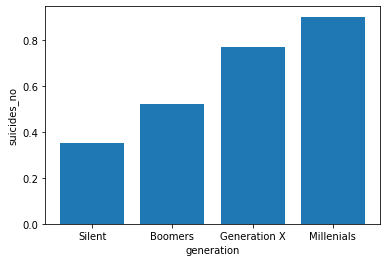

In [25]:
# scatter plot of generation vs usage
plt.bar(merged_df.generation, merged_df.usage)
plt.xlabel('generation')
plt.ylabel('suicides_no')
plt.show()